In [106]:
#Provide import statements for numpy, matplotlib.pyplot, pandas as pd, and curve_fit from scipy.optimize


In [3]:
#0. Source ID: the IAU designation for the SPT-detected source.
#1. RA: right ascension (J2000) in degrees.
#2. DEC: declination (J2000) in degrees.
#3. S/N (2.0 mm): detection significance (signal-to-noise ratio) in the 2.0 mm band.
#4. Sraw (2.0 mm): raw flux (uncorrected for flux boosting) in the 2.0 mm band.
#5. Sbest (2.0 mm): median value of de-boosted flux at 2.0 mm.
#6. dSup (2.0 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#7. dSdown (2.0 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 2.0 mm.
#8. S/N (1.4 mm): detection significance (signal-to-noise ratio) in the 1.4 mm band.
#9. Sraw (1.4 mm): raw flux (uncorrected for flux boosting) in the 1.4 mm band.
#10. Sbest (1.4 mm): median value of de-boosted flux at 1.4 mm.
#11. dSup (1.4 mm): upper error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#12. dSdown (1.4 mm): lower error bar (1-sigma normal equivalent) of de-boosted flux at 1.4 mm.
#13. alpharaw: estimate (from the raw flux in each band) of the 2.0 mm-1.4 mm spectral index alpha
#14. alphabest: median value of spectral index.
#15. d_alphaup: upper error bar (1-sigma normal equivalent) of spectral index.
#16. d_alphadown (2.0 mm): lower error bar (1-sigma normal equivalent) of spectral index.
#17. P(alpha > 1.66): fraction of the spectral index posterior probability distribution above the threshold value of 1.66. A higher value of P means the source is more likely to be dust-dominated.
#18. Type: source classification (synchrotron- or dust-dominated).
#19. Nearest SUMSS source: angular distance (in arseconds) from the nearest source in the 36 cm (843 MHz) Sydney University Molongolo Sky Survey.
#20. Nearest RASS source: angular distance (in arseconds) from the nearest source in the ROSAT All-Sky Survey (RASS) Bright Source Catalog or Faint Source Catalog.
#21. Nearest IRAS source: angular distance (in arseconds) from the nearest source in the IRAS Faint-Source Catalog.


In [98]:
with open('source_table_vieira09_3sigma.dat','r') as f:
    df = pd.DataFrame(l.rstrip().split()[1:] for l in f)

new_header =  #grab the first row for the header
df =  #take the data less the header row
df.columns =  #set the header row as the df header

df_rem = df

In [99]:
# Use for loops and if statements to remove rows with:
# S/N(2.0mm) < 4.5 and S/N(1.4mm) < 4.5

for index, row in df_rem.iterrows():
    if float(row[]) <  and float(row[]) < :
        df_rem = df_rem.drop([index])

# All sources that made the flux cut
# Set a new array for sync sources
df_rem_all = df_rem
df_sync = df_rem

In [100]:
# Use for loops and if statements to remove rows with:
# SUMSS, RASS, IRAS, source within 60 arcseconds (df_rem)
#
# USe for loops and if statments to remove rows with:
# dust sources

In [101]:
#Flux Cuts
sig_2 = 1.3
sig_1_4 = 3.4
flux_2a = []
flux_1_4a = []
flux_2 = []
flux_1_4 = []
flux_s1_4 = []
flux_s2 =[]

for index, row in df_rem.iterrows():
    flux_2.append(float(row[4]))
    flux_1_4.append(float(row[9]))
    
for index, row in df_rem_all.iterrows():
    flux_2a.append(float(row[4]))
    flux_1_4a.append(float(row[9]))
    
for index, row in df_sync.iterrows():
    flux_s2.append(float(row[4]))
    flux_s1_4.append(float(row[9]))


In [107]:
def line():
    return 
fit, cov = curve_fit() #(func, x, y)

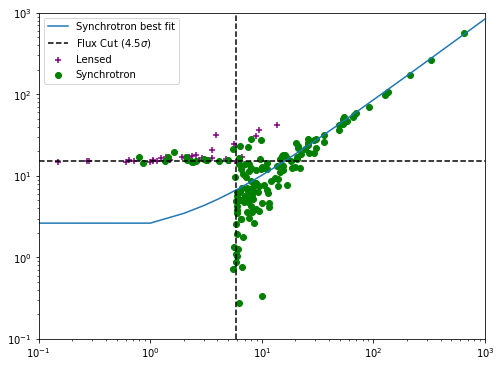

In [110]:
#Use scatter plots to plot the 1.4 mm flux versus the 2.0 mm flux for all sources above flux cut
# Scatter plot only the ones above cut and that have no counterpart
# Plot best fit line using plot
# Look how to set up a legend, use different colors and markers

fig, ax = plt.subplots(figsize = (8,6))

ax.set_yscale('log') # Here is how you change to log space
ax.set_xscale('log')
plt.xlim(.1,1000)    # here is how you set axes limits
plt.ylim(.1,1000)
ax.axvline(4.5*sig_2, ls = '--', c = 'k', label =r'Flux Cut (4.5$\sigma$)')  # here is how you draw horizontal and vertical lines
ax.axhline(4.5*sig_1_4, ls = '--', c = 'k')
plt.legend()
